<a href="https://colab.research.google.com/github/Forrestjohnson2000/6162-Seabreeze/blob/main/Src/Final_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing on Merged Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Next we do some slight cleaning of the data to make the data types more accurate.

In [ ]:
headers = [*pd.read_csv('merged_data.csv', nrows=1)]
#print(headers)

data = pd.read_csv("merged_data.csv", usecols = [c for c in headers if c != 'Unnamed: 0'], infer_datetime_format= True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data.date = pd.to_datetime(data.date)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276824 entries, 0 to 276823
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   date     276824 non-null  datetime64[ns]
 1   hour     276824 non-null  int64         
 2   station  276824 non-null  object        
 3   tmpc     276824 non-null  float64       
 4   dwpc     276824 non-null  float64       
 5   relh     276824 non-null  float64       
 6   feel     276824 non-null  float64       
 7   drct     276824 non-null  float64       
 8   sped     276824 non-null  float64       
 9   p01i     276824 non-null  object        
 10  skyc1    276824 non-null  object        
 11  WDIR     276824 non-null  float64       
 12  WSPD     276824 non-null  float64       
 13  GST      276824 non-null  float64       
 14  PRES     276824 non-null  float64       
 15  ATMP     276824 non-null  float64       
 16  WTMP     276824 non-null  float64       
dtypes: datetim

In [ ]:
data.date.value_counts()

2020-08-03    474
2020-04-20    456
2020-08-01    456
2020-04-24    456
2020-08-02    444
             ... 
2013-07-27      8
2014-01-29      8
2018-05-12      6
2013-03-10      4
2013-06-23      4
Name: date, Length: 2642, dtype: int64

In [ ]:
dat_latest = data[data['date'] == "2020-08-03"]

dat_latest[dat_latest['hour'] == 0]

,date,hour,station,tmpc,dwpc,relh,feel,drct,sped,p01i,skyc1,WDIR,WSPD,GST,PRES,ATMP,WTMP
254370,2020-08-03,0,HXD,28.00,23.00,74.28,88.26,120.000000,6.90,0,CLR,133.0,5.8,7.4,1014.3,28.6,30.2
254371,2020-08-03,0,HXD,28.00,23.00,74.28,88.26,120.000000,6.90,0,CLR,134.0,5.8,9.1,1014.4,28.4,30.2
254372,2020-08-03,0,HXD,28.00,23.00,74.28,88.26,120.000000,6.90,0,CLR,119.0,5.9,9.5,1014.4,28.4,30.2
254373,2020-08-03,0,HXD,28.00,23.00,74.28,88.26,120.000000,6.90,0,CLR,118.0,6.6,10.2,1014.3,28.3,30.1
254374,2020-08-03,0,HXD,28.00,24.00,78.90,89.48,135.170459,3.45,0,FEW,133.0,5.8,7.4,1014.3,28.6,30.2
254375,2020-08-03,0,HXD,28.00,24.00,78.90,89.48,135.170459,3.45,0,FEW,134.0,5.8,9.1,1014.4,28.4,30.2
254376,2020-08-03,0,HXD,28.00,24.00,78.90,89.48,135.170459,3.45,0,FEW,119.0,5.9,9.5,1014.4,28.4,30.2
254377,2020-08-03,0,HXD,28.00,24.00,78.90,89.48,135.170459,3.45,0,FEW,118.0,6.6,10.2,1014.3,28.3,30.1
254378,2020-08-03,0,SUT,28.50,24.50,78.97,91.75,160.000000,3.45,0,CLR,133.0,5.8,7.4,1014.3,28.6,30.2
254379,2020-08-03,0,SUT,28.50,24.50,78.97,91.75,160.000000,3.45,0,CLR,134.0,5.8,9.1,1014.4,28.4,30.2


In [ ]:
df_group = data.groupby(["date", 'hour']).mean()
df_group

tmpc       dwpc       relh  ...         PRES  ATMP       WTMP
date       hour                                   ...                              
2013-01-01 0      5.575000   3.800000  88.357500  ...  1017.408303  11.0  21.836225
           1      6.314286   5.128571  92.332857  ...  1017.408303  11.0  21.836225
           2      7.700000   6.433333  92.093333  ...  1017.408303  11.4  21.836225
           4      9.650000   8.500000  92.836667  ...  1017.408303  12.5  21.836225
           6      9.233333   8.050000  92.618333  ...  1017.408303  12.8  21.836225
...                    ...        ...        ...  ...          ...   ...        ...
2020-12-31 19    20.722500  16.792500  78.252500  ...  1019.800000  15.8  13.300000
           20    19.402500  16.597500  83.857500  ...  1019.600000  15.6  13.100000
           21    18.695000  16.597500  87.665000  ...  1019.800000  15.8  13.100000
           22    18.500000  16.390000  87.512500  ...  1019.900000  15.7  13.000000
           23    18.152500  16.430000  89.707500  ...  1020.700000  16.1  13.200000

[58834 rows x 12 columns]

Based on what Joe Merchant mentioned about wind convergence from the land and sea, we created a varaible to try and measure this convergence using the values Merchant suggested. Unfortunately the results did not seem to rpovide any insights worthwhile so we are probably not going to move foreward with this variable

In [ ]:
data["wconverge"]= (data["WDIR"].between(150,180) & (data["drct"].between(225,270)))

In [ ]:
data["wconverge"].value_counts()

False    275557
True       1267
Name: wconverge, dtype: int64

Another import factor that Joe mentioned was the temperature difference between the sea and the land, so we created a variable called **Temp_dif** to determine that measurement. Hopefully it will provide insights further along when we get into Logistic Regression and Clustering.

In [ ]:
data['Temp_dif'] = data.ATMP - data.tmpc

data.Temp_dif.describe()

count    276824.000000
mean          1.379728
std           3.328656
min         -39.300000
25%          -0.600000
50%           1.100000
75%           3.000000
max          55.200000
Name: Temp_dif, dtype: float64

In [ ]:
#data[data.hour.between(10,16)]

data.head()

,date,hour,station,tmpc,dwpc,relh,feel,drct,sped,p01i,skyc1,hh,WDIR,WSPD,GST,PRES,ATMP,WTMP,wconverge,Temp_dif
0,2013-01-01,0,HXD,8.0,7.0,93.40,46.40,0.0,0.0,NaN,CLR,0,120.0,2.0,7.296079,1017.408303,11.0,21.836225,False,3.0
1,2013-01-01,0,SUT,5.0,2.7,85.07,41.00,0.0,0.0,NaN,SCT,0,120.0,2.0,7.296079,1017.408303,11.0,21.836225,False,6.0
2,2013-01-01,0,SUT,4.6,2.8,88.10,40.28,0.0,0.0,NaN,SCT,0,120.0,2.0,7.296079,1017.408303,11.0,21.836225,False,6.4
3,2013-01-01,0,SUT,4.7,2.7,86.86,40.46,0.0,0.0,NaN,SCT,0,120.0,2.0,7.296079,1017.408303,11.0,21.836225,False,6.3
4,2013-01-01,1,HXD,7.0,7.0,100.00,44.60,0.0,0.0,NaN,CLR,1,140.0,1.0,7.296079,1017.408303,11.0,21.836225,False,4.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276824 entries, 0 to 276823
Data columns (total 20 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date       276824 non-null  datetime64[ns]
 1   hour       276824 non-null  int64         
 2   station    276824 non-null  object        
 3   tmpc       276824 non-null  float64       
 4   dwpc       276824 non-null  float64       
 5   relh       276824 non-null  float64       
 6   feel       276824 non-null  float64       
 7   drct       276824 non-null  float64       
 8   sped       276824 non-null  float64       
 9   p01i       0 non-null       float64       
 10  skyc1      276824 non-null  object        
 11  hh         276824 non-null  int64         
 12  WDIR       276657 non-null  float64       
 13  WSPD       276824 non-null  float64       
 14  GST        276824 non-null  float64       
 15  PRES       276824 non-null  float64       
 16  ATMP       276824 no

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa829645c10>,
      dtype=object)

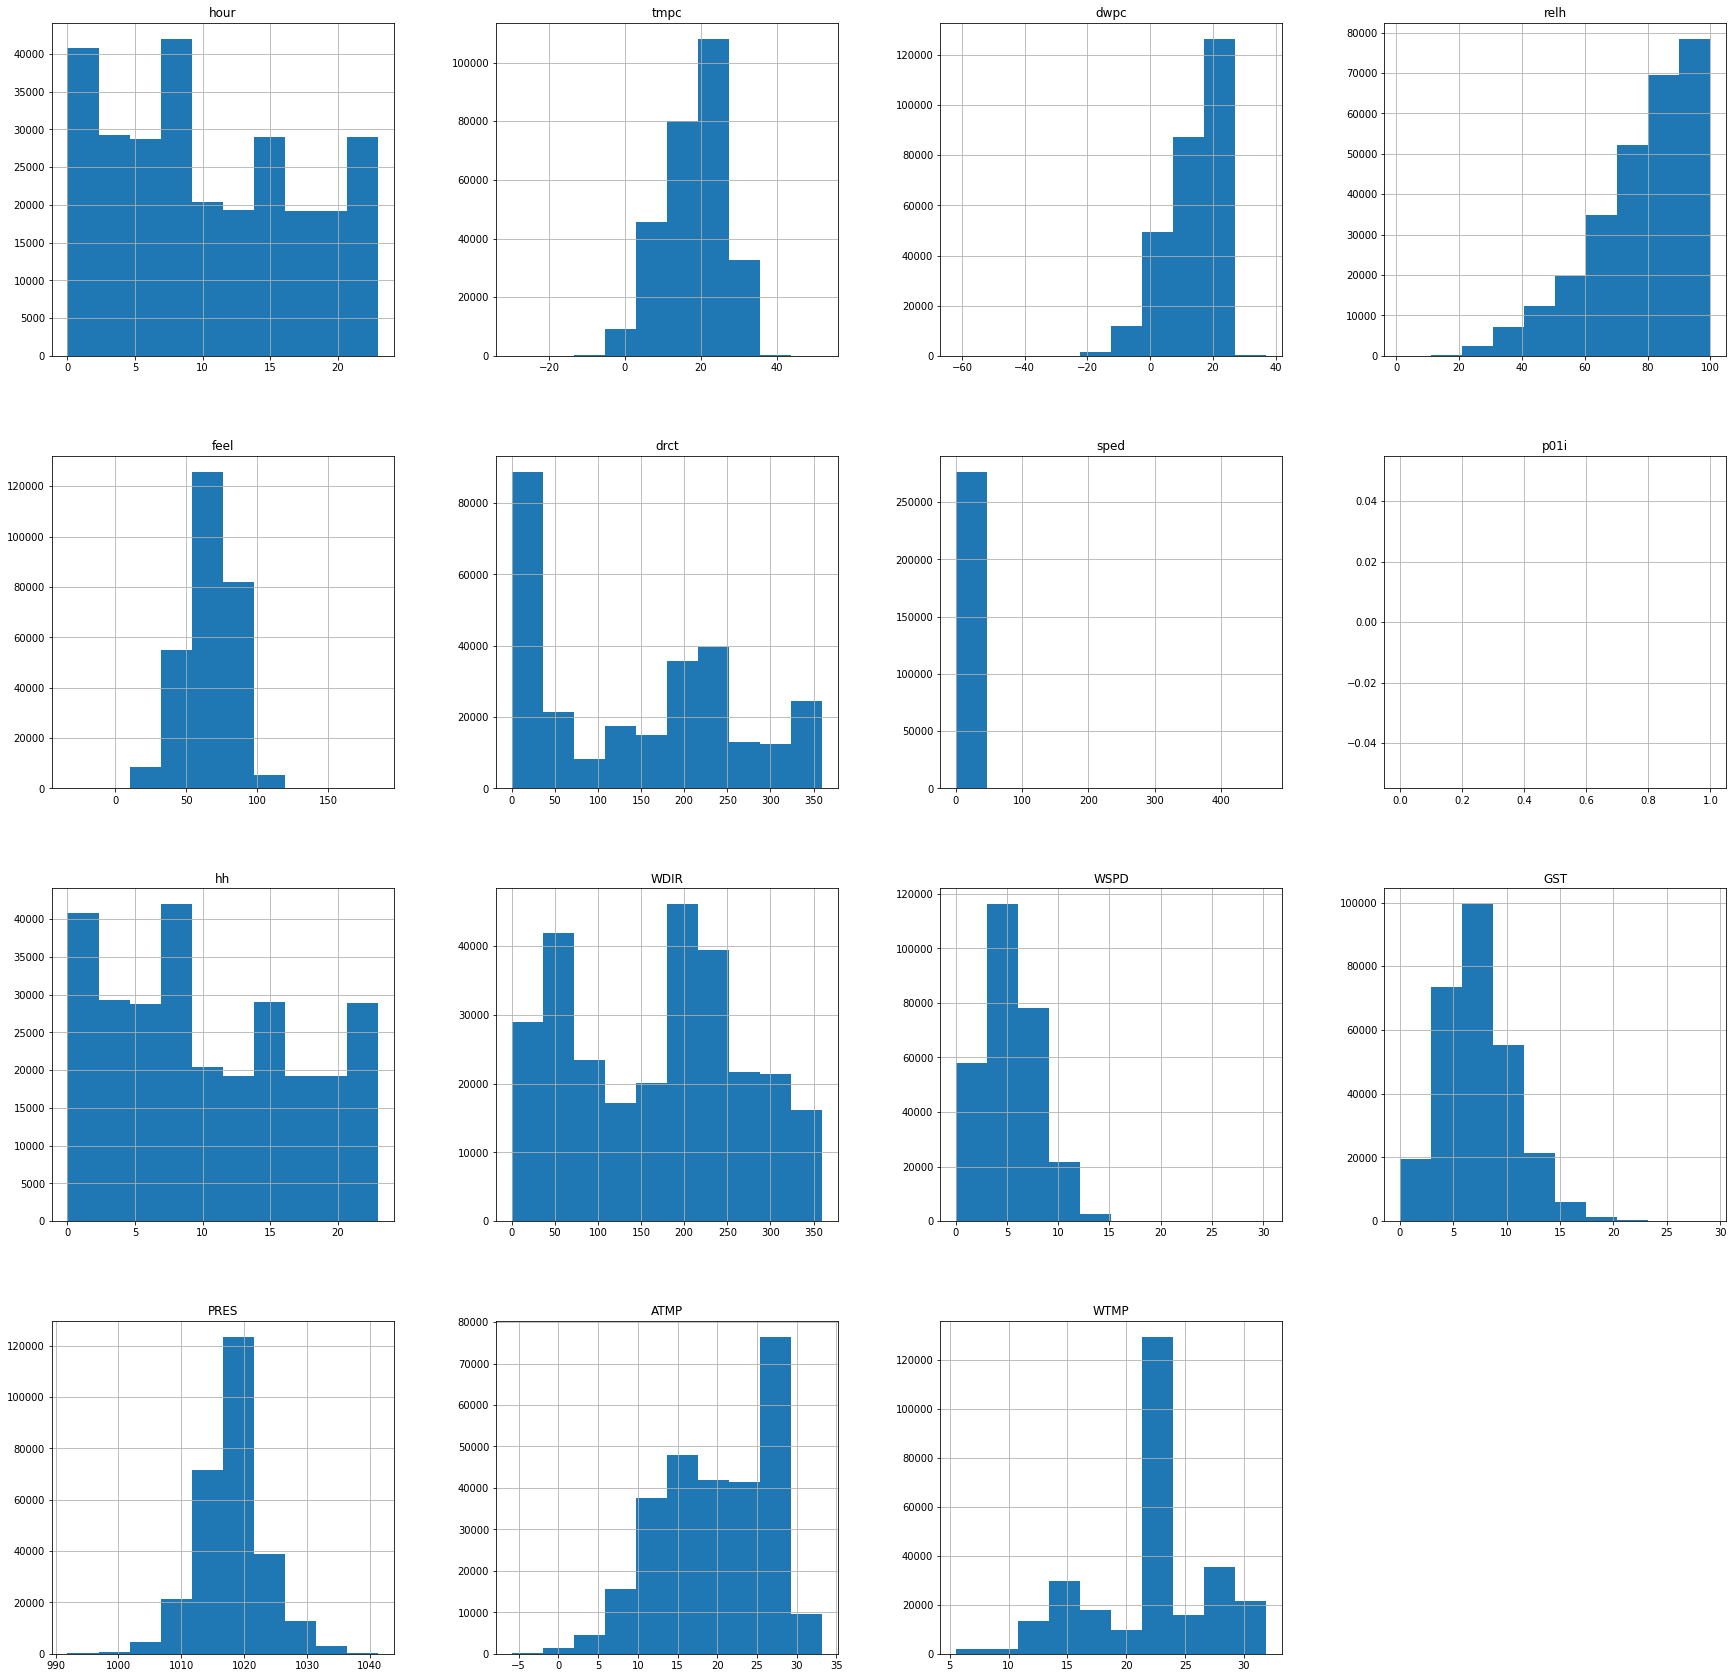

In [ ]:
data.loc[:, :"WTMP"].hist(figsize = (30,30))

Using sns we created a correlation matrix to view how each of the variables are correlated after the merging of both datasets.

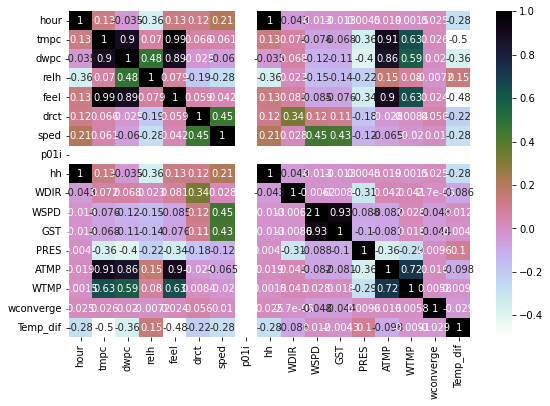

In [ ]:
import seaborn as sns
plt.figure(figsize=(9,6))
sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r')
plt.show()

Since some of the varaibles such as the temperature are skewed on some occasions we introduce the standard scaler to scale the variables.

In [ ]:
data_day = data[data["hour"].between(10,16)]

data_day.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
hour,68653.0,12.956375,2.018553,10.00,11.00,13.000000,15.00,16.00
tmpc,68653.0,18.195364,8.517704,-29.90,12.00,19.300000,25.10,45.00
dwpc,68653.0,13.612268,9.295922,-60.00,7.11,16.000000,21.50,35.00
relh,68653.0,76.498496,16.930424,3.27,65.83,78.760000,90.68,100.00
feel,68653.0,65.408355,18.622210,-33.65,53.60,66.900000,78.14,161.07
drct,68653.0,153.321765,126.441116,0.00,20.00,170.000000,250.00,360.00
sped,68653.0,6.905399,4.514687,0.00,4.60,6.900000,9.20,127.65
p01i,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hh,68653.0,12.956375,2.018553,10.00,11.00,13.000000,15.00,16.00
WDIR,68614.0,168.661920,112.254555,0.00,51.00,191.000000,265.00,360.00


In [ ]:
max_temp = max(data_day.groupby("date").tmpc)
min_temp = min(data_day.groupby("date").tmpc)

max_btemp = max(data_day.groupby("date").ATMP)
min_btemp = min(data_day.groupby("date").ATMP)

max_temp

(Timestamp('2020-12-31 00:00:00'), 271508    17.00
 271509    16.00
 271510    17.61
 271511    17.50
 271512    17.50
 271513    14.00
 271514    17.50
 271515    17.72
 271516    17.89
 271517    15.00
 271518    17.78
 271519    18.50
 271520    18.50
 271521    15.00
 271522    18.50
 271523    18.61
 271524    19.00
 271525    17.00
 271526    19.00
 271527    19.00
 271528    20.00
 271529    20.00
 271530    20.39
 271531    20.50
 271532    19.50
 271533    19.00
 271534    20.00
 271535    20.39
 271536    20.22
 Name: tmpc, dtype: float64)

In [ ]:
converge = data_day[data_day["wconverge"] == True]

print(max(converge.Temp_dif))
print(min(converge.Temp_dif))
print(np.mean(converge.Temp_dif))

13.41
-5.399999999999999
-0.9471460384503048


In order to calculate seabreeze, we need another measure of pressure closer to the shore and the weather stations, so we included another dataset with the intention of only keeping pressure to be used later.

**START HERE - CHECKPOINT**

In [ ]:
#Reading in the original Data and parsing the data to format the dat in year-month-day format 

data = pd.read_csv("merged_data.csv")
air_pres = pd.read_csv("https://raw.githubusercontent.com/Forrestjohnson2000/6162-Seabreeze/main/Data/AirPressure.csv", parse_dates = {"date" : ["#YY","MM","DD"]})
air_pres

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,date,hh,PRES,ATMP,WTMP
0,2013-01-01,0,1023.6,7.9,999.0
1,2013-01-01,0,1023.7,7.8,999.0
2,2013-01-01,0,1023.7,7.8,999.0
3,2013-01-01,0,1023.6,8.0,999.0
4,2013-01-01,0,1023.5,8.5,999.0
...,...,...,...,...,...
693103,2020-12-31,23,1021.8,18.5,8.7
693104,2020-12-31,23,1021.9,17.8,8.7
693105,2020-12-31,23,1021.7,16.8,8.7
693106,2020-12-31,23,1021.7,17.8,8.7


Replacing the missing values (here coded as 9999, 999, and 999 respectively).
Seeing we have significant missing data in all numeric columns

In [ ]:
air_pres["PRES"].replace({9999.0:np.nan}, inplace=True)
air_pres["ATMP"].replace({999.0:np.nan}, inplace=True)
air_pres["WTMP"].replace({999.0:np.nan}, inplace=True)
air_pres.isnull().sum()

date        0
hh          0
PRES     9873
ATMP    16810
WTMP    61489
dtype: int64

Here we are eliminating all columns except for date, hour, and Pressure. We are only keeping pressure to calculate the sea breeze which we will discuss further later

In [ ]:
air_pres = air_pres.drop(["ATMP", "WTMP"], axis=1)


In [ ]:
#import impute library
from sklearn.impute import SimpleImputer
#impute the mean into the missing data
apm = air_pres.copy(deep=True)
mean_imputer = SimpleImputer(strategy="mean")
air_pres.iloc[:, 2:] = mean_imputer.fit_transform(apm.iloc[:, 2:])


In [ ]:
#Here we see we have no more missing values
print(apm.isnull().sum())


date       0
hh         0
PRES    9873
dtype: int64


In [ ]:
#Making this dataframe to datetime so we can merge on the date
data.date = pd.to_datetime(data.date)
pd.DataFrame(data)

,Unnamed: 0,date,hour,station,tmpc,dwpc,relh,feel,drct,sped,p01i,skyc1,WDIR,WSPD,GST,PRES,ATMP,WTMP
0,53810,2013-01-01,0,HXD,8.00,7.00,93.40,46.40,0.0,0.00,0.00,CLR,120.0,2.0,7.296079,1017.408303,11.0,21.836225
1,53810,2013-01-01,0,SUT,5.00,2.70,85.07,41.00,0.0,0.00,0.0,SCT,120.0,2.0,7.296079,1017.408303,11.0,21.836225
2,53810,2013-01-01,0,SUT,4.60,2.80,88.10,40.28,0.0,0.00,0.0,SCT,120.0,2.0,7.296079,1017.408303,11.0,21.836225
3,53810,2013-01-01,0,SUT,4.70,2.70,86.86,40.46,0.0,0.00,0.0,SCT,120.0,2.0,7.296079,1017.408303,11.0,21.836225
4,53811,2013-01-01,1,HXD,7.00,7.00,100.00,44.60,0.0,0.00,T,CLR,140.0,1.0,7.296079,1017.408303,11.0,21.836225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276819,7967,2020-12-16,10,SUT,7.78,6.00,88.51,39.82,20.0,13.80,0,OVC,342.0,10.6,14.700000,1014.600000,9.7,15.300000
276820,7967,2020-12-16,10,SUT,7.78,6.00,88.51,41.36,20.0,9.20,0,OVC,342.0,10.6,14.700000,1014.600000,9.7,15.300000
276821,8171,2020-12-24,22,SUT,18.72,17.61,93.26,65.70,170.0,12.65,0,SCT,203.0,8.9,14.400000,1005.200000,17.5,14.300000
276822,8171,2020-12-24,22,SUT,18.78,17.61,92.93,65.80,160.0,10.35,0,SCT,203.0,8.9,14.400000,1005.200000,17.5,14.300000


## Sea Breeze Data Creation 

### Calculation of Sea Breeze

Using multiple formulas found to calculate air density (), we created an estimated calculation for the condusiveness of a sea breeze at any given time. this originates from the report on sea breeze calculation that estimates that conduciveness of sea breeze can be calculated using air density *h*, overwater temperature *T*, and the gravitational constant. this variable is known as **SBI** and a value under 5 is an indication that weather factors are conducive to produce a sea breeze. We are still working on perfecting these variables and are not quite sure how accurate the final results are yet based on the description of **SBI**.

In [ ]:
Saturated_vapor_pressure = 6.1078 * (10**((7.5*(data.tmpc))/(data.tmpc + 273.15)))
vapor_pressure = Saturated_vapor_pressure * (data.relh)
dry_pressure = data.PRES - vapor_pressure

air_density = dry_pressure/(287.058*(data.tmpc+273.15)) + vapor_pressure/(461.495*(data.tmpc+273.15))

SBI = 19.6*air_density/(data.ATMP+273.15)
SBI = SBI*10000
#print(data.ATMP.describe())
print(SBI.describe())

SBI[SBI >= 0]

count    276824.000000
mean          3.539338
std           2.217108
min         -14.177925
25%           1.552144
50%           3.351563
75%           5.370722
max           9.777402
dtype: float64


11004    -0.036947
11008    -0.036947
11009    -0.036947
12878    -0.087038
12879    -0.087038
            ...   
276446   -0.109697
276447   -0.077328
276482   -0.157392
276483   -0.163265
276484   -0.138169
Length: 3618, dtype: float64

In [ ]:
data["SBI"] = SBI
sea_breeze_data = data
sea_breeze_data
sea_breeze_data.to_csv("sbd.csv")

,Unnamed: 0,date,hour,station,tmpc,dwpc,relh,feel,drct,sped,p01i,skyc1,WDIR,WSPD,GST,PRES,ATMP,WTMP,SBI
0,53810,2013-01-01,0,HXD,8.00,7.00,93.40,46.40,0.0,0.00,0.00,CLR,120.0,2.0,7.296079,1017.408303,11.0,21.836225,5.683124
1,53810,2013-01-01,0,SUT,5.00,2.70,85.07,41.00,0.0,0.00,0.0,SCT,120.0,2.0,7.296079,1017.408303,11.0,21.836225,6.475055
2,53810,2013-01-01,0,SUT,4.60,2.80,88.10,40.28,0.0,0.00,0.0,SCT,120.0,2.0,7.296079,1017.408303,11.0,21.836225,6.459742
3,53810,2013-01-01,0,SUT,4.70,2.70,86.86,40.46,0.0,0.00,0.0,SCT,120.0,2.0,7.296079,1017.408303,11.0,21.836225,6.476219
4,53811,2013-01-01,1,HXD,7.00,7.00,100.00,44.60,0.0,0.00,T,CLR,140.0,1.0,7.296079,1017.408303,11.0,21.836225,5.677941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276819,7967,2020-12-16,10,SUT,7.78,6.00,88.51,39.82,20.0,13.80,0,OVC,342.0,10.6,14.700000,1014.600000,9.7,15.300000,5.885612
276820,7967,2020-12-16,10,SUT,7.78,6.00,88.51,41.36,20.0,9.20,0,OVC,342.0,10.6,14.700000,1014.600000,9.7,15.300000,5.885612
276821,8171,2020-12-24,22,SUT,18.72,17.61,93.26,65.70,170.0,12.65,0,SCT,203.0,8.9,14.400000,1005.200000,17.5,14.300000,2.844736
276822,8171,2020-12-24,22,SUT,18.78,17.61,92.93,65.80,160.0,10.35,0,SCT,203.0,8.9,14.400000,1005.200000,17.5,14.300000,2.845321


In [ ]:
sea_breeze_data = pd.read_csv("sbd.csv")
sea_breeze_data.date.value_counts

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<bound method IndexOpsMixin.value_counts of 0         2013-01-01
1         2013-01-01
2         2013-01-01
3         2013-01-01
4         2013-01-01
             ...    
276819    2020-12-16
276820    2020-12-16
276821    2020-12-24
276822    2020-12-24
276823    2020-12-24
Name: date, Length: 276824, dtype: object>

In [ ]:
df1 = sea_breeze_data[sea_breeze_data["hour"] == 14]
df1 = df1.groupby(["date"], as_index = False).mean()
df2 = sea_breeze_data[sea_breeze_data["hour"] == 15]
df2 = df2.groupby(["date"], as_index = False).mean()
df3 = sea_breeze_data[sea_breeze_data["hour"] == 16]
df3 = df3.groupby(["date"], as_index = False).mean()

df4 = df1.append(df2)
df5 = df4.append(df3)

df5

df5.to_csv("sea_breeze_hours.csv")

Reading in Data

In [ ]:
sb_hours = pd.read_csv("sea_breeze_hours.csv")
sharkdata = pd.read_csv("sharkdata.csv", usecols= ["Attack", "Date"])

sb_hours["date"] = pd.to_datetime(sb_hours["date"])

sharkdata["Attack"] = sharkdata["Attack"].astype('category')
sharkdata["AttackCat"] = sharkdata["Attack"].cat.codes
sharkdata["Date"] = pd.to_datetime(sharkdata["Date"])

sb_shark = sb_hours.merge(sharkdata, how = "left", left_on = "date", right_on = "Date")

sb_shark = sb_shark.drop(columns = ["Date", "Attack"])

sb_shark.AttackCat = sb_shark.AttackCat.replace(np.nan, 0) 

In [ ]:
sb_shark.AttackCat.value_counts()

0.0    7307
1.0      95
Name: AttackCat, dtype: int64

In [ ]:
sb_shark.date.min()

Timestamp('2013-01-01 00:00:00')

In [ ]:
dtrange = pd.date_range(start = "2013-01-01", end = "2016-12-31")
#[for date in dtrange]
shark_train = sb_shark[(sb_shark.date > '2013-01-01') & (sb_shark.date < '2016-12-31')]

shark_train = shark_train.drop(columns = ["Unnamed: 0","Unnamed: 0.1","Unnamed: 0.1.1"])

shark_train

,date,hour,tmpc,dwpc,relh,feel,drct,sped,WDIR,WSPD,GST,PRES,ATMP,WTMP,SBI,AttackCat
1,2013-01-02,14.0,12.3000,11.7750,96.6475,54.1400,67.500000,8.0500,250.0,4.0,7.296079,1017.408303,13.3,21.836225,4.547025,0.0
2,2013-01-03,14.0,5.7250,4.7000,93.1225,41.4400,22.500000,2.0125,80.0,5.0,7.296079,1017.408303,10.8,21.836225,6.092861,0.0
3,2013-01-05,14.0,4.6750,-2.8750,58.1550,34.8900,25.000000,8.3375,50.0,6.0,7.296079,1017.408303,9.2,21.836225,7.273592,0.0
4,2013-01-06,14.0,8.1000,6.3000,88.4150,46.5800,0.000000,0.0000,350.0,5.0,7.296079,1017.408303,10.7,21.836225,5.821537,0.0
5,2013-01-07,14.0,7.5500,1.1000,63.8100,40.7975,25.000000,9.4875,50.0,8.0,7.296079,1017.408303,10.4,21.836225,6.718124,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5991,2016-12-26,16.0,15.1525,11.6250,80.1200,59.2750,32.500000,6.3250,38.0,6.6,8.300000,1032.100000,13.7,13.900000,4.738069,0.0
5992,2016-12-27,16.0,18.9300,17.5000,91.5700,66.0750,250.000000,11.7875,269.0,0.8,1.900000,1025.500000,13.7,13.900000,3.090149,0.0
5993,2016-12-28,16.0,18.2925,8.4025,54.2350,64.9250,48.792615,6.3250,270.0,1.8,2.400000,1021.500000,15.0,14.400000,5.244294,0.0
5994,2016-12-29,16.0,17.6800,16.2625,91.6275,63.8250,222.500000,12.3625,225.0,8.3,10.900000,1012.900000,16.2,14.300000,3.314484,0.0


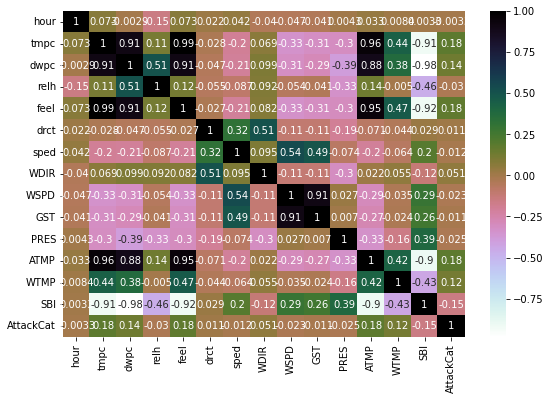

In [ ]:
import seaborn as sns
plt.figure(figsize=(9,6))
sns.heatmap(shark_train.corr(),annot=True,cmap='cubehelix_r')
plt.show()

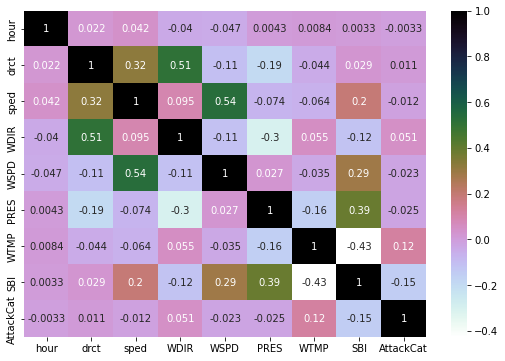

In [ ]:
st = shark_train.drop(columns = ["tmpc", "ATMP", "dwpc", "feel", "relh", "GST"])

plt.figure(figsize=(9,6))
sns.heatmap(st.corr(),annot=True,cmap='cubehelix_r')
plt.show()

In [ ]:
st.to_csv("prepped_data.csv")